In [15]:
## Import library

import pandas as pd 
# import keras
import numpy as np
import matplotlib.pyplot as plt
from cleanlab.classification import CleanLearning
# import tensorflow as tf
# from tensorflow import keras
# from keras import backend as K
from cleanlab import *
from torch import nn
from skorch import NeuralNetClassifier
from sklearn.model_selection import cross_val_predict


In [4]:
## Load the datas 

fmnist_test = pd.read_csv('fashion-mnist_test.csv')
fmnist_train = pd.read_csv('fashion-mnist_train.csv')

In [5]:
## Sort datas in x and y 

label_fmnist_test = fmnist_test.iloc[:,0]
label_fmnist_train = fmnist_train.iloc[:,0]
fmnist_test = fmnist_test.iloc[:,1:]
fmnist_train = fmnist_train.iloc[:,1:]

In [6]:
##Our label is jsute a number,

label_fmnist_test.shape

(10000,)

In [7]:
## Normalize

normalized_fmnist_test = fmnist_test /255
normalized_fmnist_train = fmnist_train /255

In [8]:
## We then constructs our pictures 
fashion_test = np.array(normalized_fmnist_test)
fashion_test = fashion_test.reshape(len(fashion_test),1,28,28)

fashion_train = np.array(normalized_fmnist_train)
fashion_train = fashion_train.reshape(len(fashion_train),1,28,28)

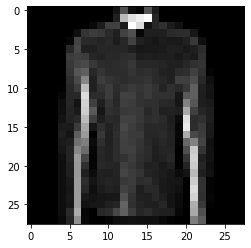

In [11]:
## Show if its good 
exemple_image = fashion_test[77,0,:,:]
plt.imshow(exemple_image, cmap='gray')

In [12]:
class ClassifierModule(nn.Module):
    def __init__(self):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 6, 3),
            nn.ReLU(),
            nn.BatchNorm2d(6),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 3),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.out = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax(dim=-1),
        )

    def forward(self, X):
        X = self.cnn(X)
        X = self.out(X)
        return X

In [14]:
model_skorch = NeuralNetClassifier(ClassifierModule, max_epochs=50)

In [17]:
y = label_fmnist_test
X = fashion_test

num_crossval_folds = 5
pred_probs = cross_val_predict(model_skorch, X, y,
                               cv=num_crossval_folds,
                               method='predict_proba')

/home/craven/miniconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


RuntimeError: Input type (double) and bias type (float) should be the same